### Μαντζαρόπουλος Κώστας

# E1

Ας εισάγουμε αρχικά τις βιβλιοθήκες που θα χρειαστούμε.

In [111]:
import pandas as pd
import numpy as np

Διαβάζουμε τα δεδομένα μας και τα εκχωρούμε σε ένα DataFrame

In [112]:
noaa_data = pd.read_csv("./noaa_hellinikon_1995_2020.csv", parse_dates=["DATE"])
athens_data = pd.read_csv("./athens.csv")

In [113]:
athens_data.head()

,2010-01-01,17.9,18.1,17.8,61.4,91,33,1003.6,1006.3,1002.0,0.2,4.0,WSW,12.7
0,2010-01-02,15.6,15.7,15.5,57.4,70,45,1005.2,1008.7,1001.5,0.0,6.8,WSW,20.7
1,2010-01-03,13.5,13.6,13.4,56.0,76,39,1011.7,1016.7,1008.6,0.0,5.0,WSW,15.4
2,2010-01-04,9.5,9.6,9.5,50.7,60,38,1021.3,1023.1,1016.8,0.0,4.3,NNE,11.0
3,2010-01-05,13.4,13.5,13.4,70.5,82,54,1018.7,1022.1,1015.5,0.0,7.9,S,19.8
4,2010-01-06,16.8,16.9,16.8,79.3,83,72,1012.9,1015.6,1011.1,0.0,15.2,S,34.3


Με μια μικρή ματιά παρατηρούμε πως τα δεδομένα μας από το `athens dataset` **δεν** έχουν ονόματα στις στήλες, συνεπώς συμπληρώνουμε τα ονόματα των στηλών όπως μας αναφέρει η τεκμηρίωση του αρχείου *athens.csv*.

---

Για πληρότητα αναφέρουμε εδώ τις μονάδες που μετράμε κάθε φυσική ποσότητα:
- Θερμοκρασία (temp) σε  ($^oC$)
- Σχετική υγρασία (relative humidity) σε  $(\%)$
- Πίεση (pressure) σε $(hPa)$ $%hectopascal$
- Βροχόπτωση (rainfall) σε  $(mm)$
- Ταχύτητα ανέμου (wind speed)  $(km/h)$


In [114]:
athens_data = pd.read_csv("./athens.csv", names = ["Date", "Mean temp", "Max temp", "Min temp", "Mean relative humidity", "Max relative humidity", "Min relative humidity" ,"Mean pressure", "Max pressure", "Min pressure", "Daily rainfall", "Mean wind speed", "Dominant wind direction", "Wind gust"], parse_dates=["Date"],  na_values={"Mean temp": "---"})


In [115]:
athens_data.head()

,Date,Mean temp,Max temp,Min temp,Mean relative humidity,Max relative humidity,Min relative humidity,Mean pressure,Max pressure,Min pressure,Daily rainfall,Mean wind speed,Dominant wind direction,Wind gust
0,2010-01-01,17.9,18.1,17.8,61.4,91,33,1003.6,1006.3,1002.0,0.2,4.0,WSW,12.7
1,2010-01-02,15.6,15.7,15.5,57.4,70,45,1005.2,1008.7,1001.5,0.0,6.8,WSW,20.7
2,2010-01-03,13.5,13.6,13.4,56.0,76,39,1011.7,1016.7,1008.6,0.0,5.0,WSW,15.4
3,2010-01-04,9.5,9.6,9.5,50.7,60,38,1021.3,1023.1,1016.8,0.0,4.3,NNE,11.0
4,2010-01-05,13.4,13.5,13.4,70.5,82,54,1018.7,1022.1,1015.5,0.0,7.9,S,19.8


In [116]:
noaa_data.head()

,STATION,NAME,DATE,TAVG
0,GR000016716,"HELLINIKON, GR",1955-01-01,NaN
1,GR000016716,"HELLINIKON, GR",1955-01-02,NaN
2,GR000016716,"HELLINIKON, GR",1955-01-03,NaN
3,GR000016716,"HELLINIKON, GR",1955-01-04,NaN
4,GR000016716,"HELLINIKON, GR",1955-01-05,NaN


In [117]:
noaa_data.isna().sum()

STATION       0
NAME          0
DATE          0
TAVG       2311
dtype: int64

Παρατηρούμε πως υπάρχουν αρκετές τιμές που λείπουν από το `noaa dataset` που αντιστοιχούν σε μέσες θερμοκρασίες ορισμένων ημερομηνιών.

Καλό θα ήταν βέβαια να ποσοτικοποιήσουμε τις NaN τιμές ώστε να ξέρουμε τι μας γίνεται.
Γενικά βλέπουμε πως στην στήλη TAVG της θερμοκρασίας υπάρχουν 2311 καταχωρήσεις χωρίς τιμές!

Επιπλέον, για να είναι τα δεδομένα μας πλήρη θα πρέπει να έχουμε για κάθε χρόνο όλες τις θερμοκρασίες δλδ 365 ή 366 θερμοκρασίες το χρόνο.
Συνεπώς πρέπει να ελέγξουμε τον αριθμό των θερμοκρασιών που υπάρχουν ανά χρονιά για να είμαστε σίγουροι.

In [118]:
year_sum = noaa_data["DATE"].dt.year.value_counts(sort = True)
year_sum.tail(10)

1981    365
1989    365
1987    365
2007    364
2018    364
2006    363
2017    342
2012    160
2014     98
2013     10
Name: DATE, dtype: int64

Έχοντας αθροίσει όλες τις τιμές των ημερών παρατηρούμε πως για τα έτη 2006, 2007, 2012, 2013, 2014, 2017 και 2018 δεν υπάρχουν τιμές της θερμοκρασίας για όλες τις ημέρες του έτους.

Ακριβώς αυτές τις τιμές θα προσπαθήσουμε να συμπληρώσουμε από το δεύτερο dataset.

Ας εξακριβώσουμε όμως ότι το δεύτερο dataset είναι τουλάχιστον πλήρες εκεί που το πρώτο είναι ελλειπές

In [119]:
athens_years_sum = athens_data["Date"].dt.year.value_counts(sort = False)
athens_years_sum

2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
Name: Date, dtype: int64

In [120]:
year_sum.sort_index().loc[2010:2019]

2010    365
2011    365
2012    160
2013     10
2014     98
2015    365
2016    365
2017    342
2018    364
2019    365
Name: DATE, dtype: int64

In [121]:
compare = athens_years_sum == year_sum.sort_index().loc[2010:2019]
compare

2010     True
2011     True
2012    False
2013    False
2014    False
2015     True
2016    False
2017    False
2018    False
2019     True
dtype: bool

Το `athens dataset` φαίνεται να είναι πλήρες.


Συγκρίνοντας τις τιμές των δύο dataset βλέπουμε άλλη μια διαφορά μεταξύ των δύο, μια έλλειψη τιμής το δίσεκτο έτος 2016 στο `noaa dataset`.

Συμπέρασμα: Θα πρέπει να συμπληρώσουμε τις τιμές του `noaa dataset` με εκείνες του `athens dataset` για τα ημερολογιακά έτη 2012, 2013, 2014, 2016, 2017 και 2018.

Φυσικά θα υπάρχουν κάποιες τιμές που είναι συμπληρωμένες και στα δύο dataset.

In [122]:
noaa_data.rename(columns = {"DATE": "Date"}, inplace=True)

In [123]:
noaa_data_10_20 = noaa_data.set_index("Date").loc["2010":"2019"]
noaa_data_10_20 = noaa_data_10_20.reset_index();
noaa_data_10_20


,Date,STATION,NAME,TAVG
0,2010-01-01,GR000016716,"HELLINIKON, GR",18.0
1,2010-01-02,GR000016716,"HELLINIKON, GR",16.0
2,2010-01-03,GR000016716,"HELLINIKON, GR",13.5
3,2010-01-04,GR000016716,"HELLINIKON, GR",8.9
4,2010-01-05,GR000016716,"HELLINIKON, GR",13.1
...,...,...,...,...
2794,2019-12-27,GR000016716,"HELLINIKON, GR",9.8
2795,2019-12-28,GR000016716,"HELLINIKON, GR",8.6
2796,2019-12-29,GR000016716,"HELLINIKON, GR",5.9
2797,2019-12-30,GR000016716,"HELLINIKON, GR",4.2


In [124]:
full = pd.merge_ordered(athens_data, noaa_data_10_20, on = "Date")
full.head()

,Date,Mean temp,Max temp,Min temp,Mean relative humidity,Max relative humidity,Min relative humidity,Mean pressure,Max pressure,Min pressure,Daily rainfall,Mean wind speed,Dominant wind direction,Wind gust,STATION,NAME,TAVG
0,2010-01-01,17.9,18.1,17.8,61.4,91,33,1003.6,1006.3,1002.0,0.2,4.0,WSW,12.7,GR000016716,"HELLINIKON, GR",18.0
1,2010-01-02,15.6,15.7,15.5,57.4,70,45,1005.2,1008.7,1001.5,0.0,6.8,WSW,20.7,GR000016716,"HELLINIKON, GR",16.0
2,2010-01-03,13.5,13.6,13.4,56.0,76,39,1011.7,1016.7,1008.6,0.0,5.0,WSW,15.4,GR000016716,"HELLINIKON, GR",13.5
3,2010-01-04,9.5,9.6,9.5,50.7,60,38,1021.3,1023.1,1016.8,0.0,4.3,NNE,11.0,GR000016716,"HELLINIKON, GR",8.9
4,2010-01-05,13.4,13.5,13.4,70.5,82,54,1018.7,1022.1,1015.5,0.0,7.9,S,19.8,GR000016716,"HELLINIKON, GR",13.1


In [125]:
full["Date"].dt.year.value_counts(sort = False)

2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
Name: Date, dtype: int64

Αυτό που κάναμε στα προηγούμενα βήματα ήταν τα εξής:
- Ονομάσαμε την στήλη DATE στο `noaa dataset` όπως είναι και στο `athens dataset` για να τα προετοιμάσουμε για merge
- Κάναμε ένα ordered_merge στη στήλη Date μιας και περιέχει ημερολογιακά δεδομένα
- Τέλος τσεκάραμε εάν έγινε σωστά η ένωση των δύο dataframes και όπως βλέπουμε έγινε σωστά στην ημερομηνία

Τρέχοντας την εντολή `athens_data["Mean temp"].astype(float)` βρίσκουμε πως υπάρχουν τιμές στην θερμοκρασία που αντιστοιχούν σε strings της μορφής "---"
Σε αυτές τις θέσεις θα βάλουμε τις τιμές NaN για αυτό υπαρχει και η εντολή `na_values` όταν διαβάσαμε το αρχείο `athens.csv`.

In [126]:
athens_data.isna().sum()

Date                       0
Mean temp                  3
Max temp                   0
Min temp                   0
Mean relative humidity     0
Max relative humidity      0
Min relative humidity      0
Mean pressure              0
Max pressure               0
Min pressure               0
Daily rainfall             0
Mean wind speed            0
Dominant wind direction    0
Wind gust                  0
dtype: int64

Πρατηρούμε πως υπάρχουν 3 NaN values στην μέση θερμοκρασία που μας ενδιαφέρει και ελπίζουμε πως με την συγχώνευση των επόμενων dataframes στην θερμοκρασία θα απαλοιφθούν.

Μετατρέπουμε τον τύπο των δεδομένων σε float.

In [127]:
full["Mean temp"] = full["Mean temp"].astype(float)

Αντικαθιστούμε την παλιά στήλη Mean temp με τον μέσο όρο των δύο στηλών Mean temp και TAVG.

In [128]:
full["Mean temp"] = full[["Mean temp", "TAVG"]].mean(axis=1)

In [129]:
full.head()

,Date,Mean temp,Max temp,Min temp,Mean relative humidity,Max relative humidity,Min relative humidity,Mean pressure,Max pressure,Min pressure,Daily rainfall,Mean wind speed,Dominant wind direction,Wind gust,STATION,NAME,TAVG
0,2010-01-01,17.95,18.1,17.8,61.4,91,33,1003.6,1006.3,1002.0,0.2,4.0,WSW,12.7,GR000016716,"HELLINIKON, GR",18.0
1,2010-01-02,15.80,15.7,15.5,57.4,70,45,1005.2,1008.7,1001.5,0.0,6.8,WSW,20.7,GR000016716,"HELLINIKON, GR",16.0
2,2010-01-03,13.50,13.6,13.4,56.0,76,39,1011.7,1016.7,1008.6,0.0,5.0,WSW,15.4,GR000016716,"HELLINIKON, GR",13.5
3,2010-01-04,9.20,9.6,9.5,50.7,60,38,1021.3,1023.1,1016.8,0.0,4.3,NNE,11.0,GR000016716,"HELLINIKON, GR",8.9
4,2010-01-05,13.25,13.5,13.4,70.5,82,54,1018.7,1022.1,1015.5,0.0,7.9,S,19.8,GR000016716,"HELLINIKON, GR",13.1


In [130]:
temp2 = full[["Date", "Mean temp"]].set_index("Date")
temp2.isna().sum()

Mean temp    1
dtype: int64

Bλέπουμε πως ακόμα υπάρχει **μια καταχώρηση** χωρίς τιμή. 
Ας βρούμε ποιά είναι αυτή η καταχώρηση και σε τι μήνα αντιστοιχεί.

In [131]:
temp2[temp2["Mean temp"].isna()]

,Mean temp
Date,
2013-05-20,NaN


In [132]:
temp2.fillna(method = "bfill", inplace=True)
temp2.loc["2013-05-15":"2013-05-25"]

,Mean temp
Date,
2013-05-15,21.10
2013-05-16,20.95
2013-05-17,22.00
2013-05-18,24.30
2013-05-19,26.30
2013-05-20,26.00
2013-05-21,26.00
2013-05-22,25.30
2013-05-23,25.10


Όπως βλέπουμε αντιστοιχεί στην 20-05-2013.

Γεμίσαμε αυτή την τιμη με την μέθοδο bfill, η οποία επιλέχθηκε ταυχαία.


Η τιμή που εκχωρήθηκε δηλαδή οι $26^o\,C $ είναι απολύτως λογική.


In [133]:
noaa_data.rename(columns = {"TAVG": "Mean temp"}, inplace=True)
noaa_data.drop(labels=["STATION", "NAME"], axis=1, inplace=True)
noaa_data.set_index("Date", inplace=True)

In [134]:
temp1 =noaa_data.loc["1955":"2009"]
temp3 =noaa_data.loc["2020":"2020"]

In [135]:
noaa_data_full = pd.concat([temp1,temp2,temp3])
noaa_data_full.isna().sum()

Mean temp    2311
dtype: int64

Τέλος ενώνουμε κάθετα τα 3 dataframes που έχουμε δημιουργήσει.

In [136]:
noaa_data_full

,Mean temp
Date,
1955-01-01,NaN
1955-01-02,NaN
1955-01-03,NaN
1955-01-04,NaN
1955-01-05,NaN
...,...
2020-12-27,16.6
2020-12-28,14.8
2020-12-29,16.3


**Τελικά** μέσα από όλη αυτή τη διαδικασία που σίγουρα θα μπορούσε να γίνει και πιο γρήγορα φτάσαμε στο αποτέλεσμα που επιθυμούμε. :)

---
---

# E2

Στο δεύτερο ερώτημα της εργασίας ελπίζουμε να κάνουμε τα πράγματα πιο γρήγορα.

Ας καλέσουμε τις βιβλιοθήκες για τα γραφήματα.

In [137]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Επιλέγουμε τις χρονιές 1974 - 1999 και τις τιμές που λέιπουν τις συμπληρώνουμε με τη μέθοδο της linear interpolation.

Έπειτα προβάλουμε τις τιμές που ήταν NaNs για να εξετάσουμε εάν οι θερμοκρασίες είναι λογικές και δεν έχουμε κάνει κάποιο λάθος.

In [138]:
temp_74_99_na = noaa_data_full.loc["1974":"1999"]

In [139]:
temp_74_99_inter = temp_74_99_na.interpolate(method='time')
temp_74_99_inter[temp_74_99_na["Mean temp"].isna()]


,Mean temp
Date,
1974-07-21,27.420000
1974-07-22,27.240000
1974-07-23,27.060000
1974-07-24,26.880000
1974-08-15,25.166667
1974-08-16,26.633333
1975-05-31,22.800000
1976-10-15,19.700000
1999-01-10,13.900000


Θα επιλέξουμε τους μήνες από Ιούνιο (6ο) έως Αύγουστο (8ο) και θα υπολογίσουμε τη μέση ημερήσια θερμοκρασία για όλα τα χρόνια ώστε να έχουμε τη θερμοκρασία αναφοράς.

In [140]:
mean_temp_74_99 = temp_74_99_inter[(temp_74_99_inter.index.month > 5) & (temp_74_99_inter.index.month < 9)].mean()
mean_temp_74_99

Mean temp    26.233403
dtype: float64

Θα υπολογίσουμε τώρα το μέσο όρο όλων των ετών για του καλοκαιρινούς μήνες.

Και θα χρησιμοποιήσουμε ξανά τη μέθοδο linear interpolation για να γεμίσουμε τα δεδομένα που δεν υπάρχουν στο dataframe.

Μπορούμε ίσως να δικαιολογήσουμε την χρήση της μεθόδου μέσω του γραφήματος που μας παραδίδεται παρατηρώντας την γραμμική τάση της θερμοκρασίας.

In [141]:
summer_all = noaa_data_full[(noaa_data_full.index.month > 5) & (noaa_data_full.index.month < 9)].loc["1957":]
summer_all_mean = summer_all.groupby(summer_all.index.year).mean().round(1)
summer_all_mean

,Mean temp
Date,
1957,28.1
1958,27.1
1959,NaN
1960,NaN
1961,26.7
...,...
2016,28.4
2017,28.3
2018,27.7


In [142]:
summer_all_relative = summer_all_mean - mean_temp_74_99
summer_all_relative.head()

,Mean temp
Date,
1957,1.866597
1958,0.866597
1959,NaN
1960,NaN
1961,0.466597


Στη συνέχεια υπολογίζουμε τον κυλιόμενο μέσο όρο δέκα ετών.

In [143]:
summer_all['10 yr rolling avg'] = summer_all['Mean temp'].rolling(920, min_periods = 60).mean()
summer_all['rolling rel avg'] = summer_all['10 yr rolling avg'] - float(mean_temp_74_99)
rolling_avg = summer_all['rolling rel avg'].groupby(summer_all.index.year).mean()
rolling_avg = pd.DataFrame(rolling_avg)
rolling_avg.head(10)

,rolling rel avg
Date,
1957,1.873290
1958,1.028487
1959,1.254909
1960,1.254909
1961,0.913439
1962,0.824776
1963,0.959351
1964,0.960291
1965,0.856630


In [144]:
summer_all_relative_pos = summer_all_relative[summer_all_relative["Mean temp"] > 0]
summer_all_relative_neg = summer_all_relative[summer_all_relative["Mean temp"] < 0]

Και τέλος πλοτάρουμε!

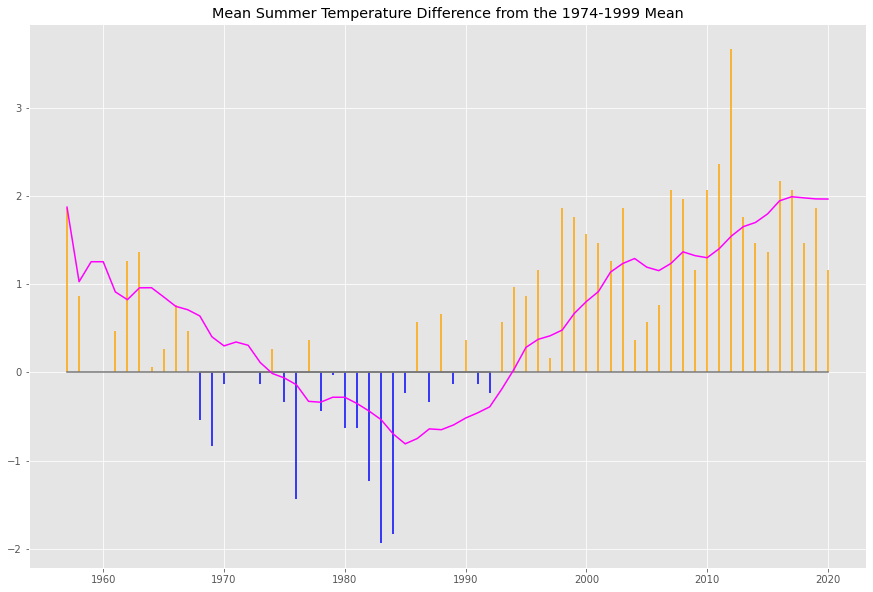

In [145]:
plt.style.use('ggplot')
plt.figure(figsize = (15,10));
plt.title("Mean Summer Temperature Difference from the 1974-1999 Mean");

fig_neg = plt.stem(
    summer_all_relative_neg.index,
    summer_all_relative_neg["Mean temp"],
    'b',
    markerfmt='none'
    );

fig_pos = plt.stem(
    summer_all_relative_pos.index,
    summer_all_relative_pos["Mean temp"],
    'orange',
    markerfmt='none'
    );

roll = plt.plot(rolling_avg.index, rolling_avg['rolling rel avg'], color='magenta')

---
---

# Ε3

Αρχικά η ιδέα είναι να 'αφαιρέσω' με κάποιο τρόπο τον χρόνο από τα δεδομένα για να μπορέσω να τα πλοτάρω στο ίδιο γράφημα, οπότε έβαλα τα δυνατά μου!

In [146]:
roll_avgs = noaa_data_full['Mean temp'].rolling('30d', min_periods =30).mean().round(2)
roll_avgs = pd.DataFrame(roll_avgs)
roll_avgs['Day'] = roll_avgs.index.day.astype(str)
roll_avgs['Month'] = roll_avgs.index.month.astype(str)
roll_avgs['Year'] = roll_avgs.index.year.astype(str)
roll_avgs['Day_month'] = roll_avgs[['Day', 'Month']].agg('-'.join, axis=1)
roll_avgs


,Mean temp,Day,Month,Year,Day_month
Date,,,,,
1955-01-01,NaN,1,1,1955,1-1
1955-01-02,NaN,2,1,1955,2-1
1955-01-03,NaN,3,1,1955,3-1
1955-01-04,NaN,4,1,1955,4-1
1955-01-05,NaN,5,1,1955,5-1
...,...,...,...,...,...
2020-12-27,14.09,27,12,2020,27-12
2020-12-28,14.15,28,12,2020,28-12
2020-12-29,14.15,29,12,2020,29-12


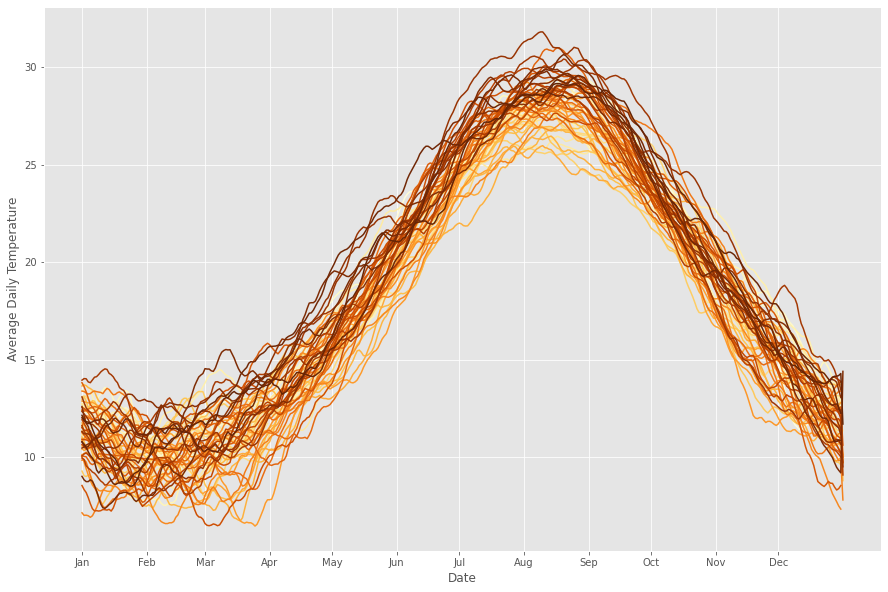

In [147]:
plt.figure(figsize = (15,10))
pal = sns.color_palette("YlOrBr", as_cmap=True)
sns.lineplot(x=roll_avgs['Day_month'] ,y=roll_avgs['Mean temp'], hue=roll_avgs.index.year, legend=False, palette=pal)
plt.xticks(ticks=[1-1, 33-2, 62-3, 94-4, 125-5, 157-6, 188-7, 220-8, 252-9, 283-10, 315-11, 346-12],
        labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']);
plt.xlabel('Date');
plt.ylabel('Average Daily Temperature');

In [220]:
roll_74_99 = roll_avgs.loc['1974':'1999']
grouped = roll_74_99.groupby(by=roll_74_99['Day_month'], sort=False).mean()

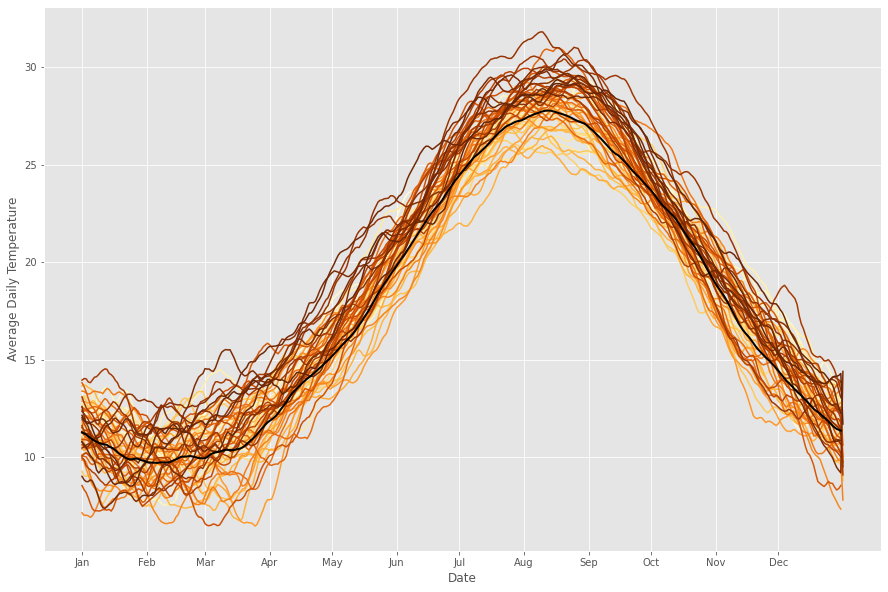

In [219]:
plt.figure(figsize = (15,10))

pal = sns.color_palette("YlOrBr", as_cmap=True)
sns.lineplot(x=roll_avgs['Day_month'] ,y=roll_avgs['Mean temp'], hue=roll_avgs.index.year, legend=False, palette=pal)

sns.lineplot(x = grouped.loc['1-1':'31-12'].index, y = grouped['Mean temp'].iloc[:-1], color = 'black', linewidth = 2)

plt.xticks(ticks=[1-1, 33-2, 62-3, 94-4, 125-5, 157-6, 188-7, 220-8, 252-9, 283-10, 315-11, 346-12],
        labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']);
plt.xlabel('Date');
plt.ylabel('Average Daily Temperature');

Στο γράφημα βλέπουμε τα εξής πράγματα:

-Αρχικά το πλήρως αναμενόμενο, ότι δηλαδή η θερμοκρασία από την άνοιξη και μετά αυξάνεται και φτάνει στο peak της το καλοκαίρι ενώ έπειτα σταδιακά μειώνεται.
- Ένα άλλο που μπορύμε να παρατηρήσουμε από τα χρώματα των καμπυλών είναι πώς σκουρόχρωμες καμπύλες βρίσκονται επάνω από την καμπύλη αναφοράς μας. Αυτό σημαίνει πώς καθώς τα χρόνια περνάνε οι θερμοκρασίες της Αθήνας αυξάνοντα ολοένα και περισσότερο.

Εν τέλει κάπως τα κατάφερα αλλα το τέλος του γραφήματος κάπως είναι "απότομο".

Θα το ετκιμούσα εάν αναρτήσετε κάπου ενδεικτικές λύσεις :)